In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data=pd.read_excel("C:/ION/ASsignment file for Data Analyst.xlsx")
data.head(10)

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0
5,1556706215000,0,66.72,1.0,26.899805,0.999485,0.0,1,1,0.0,0.0,0.0
6,1556707215000,0,66.72,1.0,27.240183,0.999433,0.0,1,1,0.0,0.0,0.0
7,1556708215000,0,66.72,1.0,27.571878,0.999385,0.0,1,1,0.0,0.0,0.0
8,1556709215000,0,66.72,1.0,27.892704,0.999339,0.0,1,1,0.0,0.0,0.0
9,1556710215000,0,66.72,1.0,28.200757,0.999295,0.0,1,1,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31104 entries, 0 to 31103
Data columns (total 12 columns):
Timestamp                             31104 non-null int64
Current                               31104 non-null int64
Total voltage                         31104 non-null float64
SOC                                   31104 non-null float64
Temperature                           31104 non-null float64
SOH                                   31104 non-null float64
Equivalent cycle                      31104 non-null float64
Application status                    31104 non-null int64
Grid status                           31104 non-null int64
Grid power                            31104 non-null float64
Grid energy consumption               31104 non-null float64
Grid cumulative energy consumption    31104 non-null float64
dtypes: float64(8), int64(4)
memory usage: 2.8 MB


In [4]:
data.isnull().sum()      # for checking null values 

Timestamp                             0
Current                               0
Total voltage                         0
SOC                                   0
Temperature                           0
SOH                                   0
Equivalent cycle                      0
Application status                    0
Grid status                           0
Grid power                            0
Grid energy consumption               0
Grid cumulative energy consumption    0
dtype: int64

In [ ]:
# There are no null values in this dataset

In [5]:
import pandas_profiling as pfr  

Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.

In [6]:
EDA=data.profile_report()
EDA

From above pandas profiling we get to know that Grid status is highly correlated with current and should be ignored for analysis, but let us compare and check it with SOC

Correlations between pairs :

In [9]:
Pair1=data[['Grid status','SOC']]
correlation = Pair1.corr()
correlation

,Grid status,SOC
Grid status,1.000000,0.227947
SOC,0.227947,1.000000


In [10]:
Pair2=data[['Equivalent cycle','SOH']]
correlation = Pair2.corr()
correlation

,Equivalent cycle,SOH
Equivalent cycle,1.000000,-0.984262
SOH,-0.984262,1.000000


In [11]:
Pair3=data[['SOC','Temperature']]
correlation = Pair3.corr()
correlation

,SOC,Temperature
SOC,1.00000,-0.36904
Temperature,-0.36904,1.00000


Correlations between all pairs are done.
Row variable correlation with the variable correlation is the value of the cell.
Correlation of a variable with itself is 1. For that reason all the diagonal value is 1.00

Visualization through heatmap

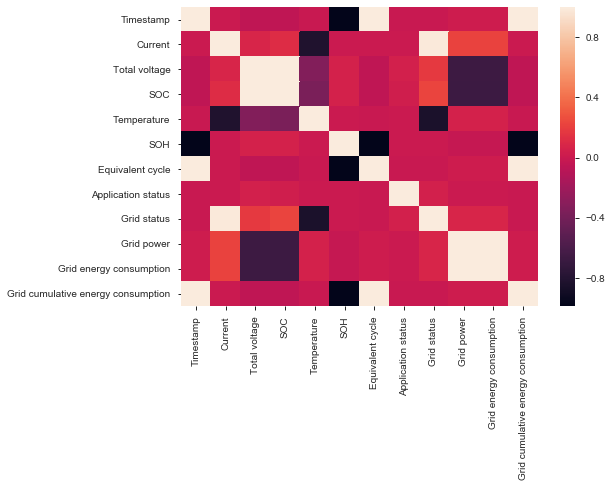

In [12]:
sns.heatmap(data.corr(method='pearson'))

Correlation coefficients whose magnitudes are between 0.5 and 0.7 indicate variables which can be considered as moderately correlated.
Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.
Correlation coefficients whose magnitude are above 0.7 indicate variables are highly correlated.

From above correlation and visualization we get to know that,  
Relationship between Pair1 i.e. Grid Status and SOC are low correlated.
Relationship between Pair2 i.e. Equivalent cycle and SOH are highely corelated.
Relationship between Pair3 i.e. SOC and Temperature are moderately correlated.

So anong all these pairs it is better to drop the highly correlated features. 

From my analysis i got to know that, in this dataset,
Grid cumulative energy consumption is highly correlated with Equivalent cycle (Correlation-0.99),
Grid power is highly correlated with Grid energy consumption (Correlation-1),
Grid status is highly correlated with energy (Correlation-0.98),
Grid status is highly correlated with energy (Correlation-0.98),
So all these features should be ignored for analysis.